$$
\newcommand{\mat}[1]{\boldsymbol {#1}}
\newcommand{\mattr}[1]{\boldsymbol {#1}^\top}
\newcommand{\matinv}[1]{\boldsymbol {#1}^{-1}}
\newcommand{\vec}[1]{\boldsymbol {#1}}
\newcommand{\vectr}[1]{\boldsymbol {#1}^\top}
\newcommand{\rvar}[1]{\mathrm {#1}}
\newcommand{\rvec}[1]{\boldsymbol{\mathrm{#1}}}
\newcommand{\diag}{\mathop{\mathrm {diag}}}
\newcommand{\set}[1]{\mathbb {#1}}
\newcommand{\cset}[1]{\mathcal{#1}}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\pderiv}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\bb}[1]{\boldsymbol{#1}}
\newcommand{\E}[2][]{\mathbb{E}_{#1}\left[#2\right]}
\newcommand{\ip}[3]{\left<#1,#2\right>_{#3}}
\newcommand{\given}[]{\,\middle\vert\,}
\newcommand{\DKL}[2]{\cset{D}_{\text{KL}}\left(#1\,\Vert\, #2\right)}
\newcommand{\grad}[]{\nabla}
$$

# Part 3: Mini-Project
<a id=part3></a>

In this part you'll implement a small comparative-analysis project, heavily based on the materials from the tutorials and homework.

You must **choose one** of the project options specified below.

### Guidelines

- You should implement the code which displays your results in this notebook, and add any additional code files for your implementation in the `project/` directory. You can import these files here, as we do for the homeworks.
- Running this notebook should not perform any training - load your results from some output files and display them here. The notebook must be runnable from start to end without errors.
- You must include a detailed write-up (in the notebook) of what you implemented and how. 
- Explain the structure of your code and how to run it to reproduce your results.
- Explicitly state any external code you used, including built-in pytorch models and code from the course tutorials/homework.
- Analyze your numerical results, explaining **why** you got these results (not just specifying the results).
- Where relevant, place all results in a table or display them using a graph.
- Before submitting, make sure all files which are required to run this notebook are included in the generated submission zip.
- Try to keep the submission file size under 10MB. Do not include model checkpoint files, dataset files, or any other non-essentials files. Instead include your results as images/text files/pickles/etc, and load them for display in this notebook. 

## Spectrally-Normalized Wasserstein GANs

In HW3 we implemented a simple GANs from scratch, using an approach very similar to the original GAN paper. However, the results left much to be desired and we discovered first-hand how hard it is to train GANs due to their inherent instability.

One of the prevailing approaches for improving training stability for GANs is to use a technique called [Spectral Normalization](https://arxiv.org/pdf/1802.05957.pdf) to normalize the largest singular value of a weight matrix so that it equals 1.
This approach is generally applied to the discriminator's weights in order to stabilize training. The resulting model is sometimes referred to as a SN-GAN.
See Appendix A in the linked paper for the exact algorithm. You can also use pytorch's `spectral_norm`.

Another very common improvement to the vanilla GAN is known a [Wasserstein GAN](https://arxiv.org/pdf/1701.07875.pdf) (WGAN). It uses a simple modification to the loss function, with strong theoretical justifications based on the Wasserstein (earth-mover's) distance.
See also [here](https://developers.google.com/machine-learning/gan/loss) for a brief explanation of this loss function.

One problem with generative models for images is that it's difficult to objectively assess the quality of the resulting images.
To also obtain a quantitative score for the images generated by each model,
we'll use the [Inception Score](https://arxiv.org/pdf/1606.03498.pdf).
This uses a pre-trained Inception CNN model on the generated images and computes a score based on the predicted probability for each class.
Although not a perfect proxy for subjective quality, it's commonly used a way to compare generative models.
You can use an implementation of this score that you find online, e.g. [this one](https://github.com/sbarratt/inception-score-pytorch) or implement it yourself.

Based on the linked papers, add Spectral Normalization and the Wassertein loss to your GAN from HW3.
Compare between:
- The baseline model (vanilla GAN)
- SN-GAN (vanilla + Spectral Normalization)
- WGAN (using Wasserstein Loss)
- Optional: SN+WGAN, i.e. a combined model using both modifications.

As a dataset, you can use [LFW](http://vis-www.cs.umass.edu/lfw/) as in HW3 or [CelebA](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html), or even choose a custom dataset (note that there's a dataloder for CelebA in `torchvision`). 

Your results should include:
- Everything written in the **Guidelines** above.
- A comparative analysis between the baseline and the other models. Compare:
  - Subjective quality (show multiple generated images from each model)
  - Inception score (can use a subset of the data).
- You should show substantially improved subjective visual results with these techniques.

##  IMPLEMENTATION of Spectrally-Normalized Wasserstein GANs

**Explaination of the structure of the code and how to run it to reproduce your results**

We have the following files under project dir:

    1. autoencoder - taken from hw3.
    2. plot_graphs - helper funcs to plot graphs.
    3. score_inception - implementation of inception score based on web .
    4. vanilla gan - vanilla gan implementation based on HW3.
    5. spectral norm gan - implementation of the net using spectral norm based on papers.
    6. wass gan - implementation of the net using wass loss based on the paper.
    7. spectral norm + wass gan - implementation of the net using spectral norm and wass loss.
    8. train gan model - implementation of training methods similar to previews HWs.
 
We have the following sub-directory:

    1. project/output_for_graphs - during a run, txt files are being saved in here
    2. project/generated_imgs - during a run, generated images are being saved in here
    3. project/screenshots_of_results - we added screenshots of each net in this notebook's results, just in case :)

During the train stage, we export the results for each epoch (Discriminator Loss, Generator Loss, Inception Score) into text files.
Later on, when we wanted to plot the graphs, we reached out to the necessary text files and import the data for the graphical representation you will see in this notebook.

**Reproducing the results**

In order to get the same results you should delete all files created by the previous run of this notebook.
Go to project/outputs_for_graphs and delete it's contect(not the folder itself).
Now go to project and delete the folder "generated_imgs".

Now you can reset the kernel and re-run the notebook, that will create temp files under project/output_for_graphs and then you can see the results on graph in the notebook itself.
If you wish to change the number of epochs, please go to project/train_gan_model.py and at line number 146 change to the number of epochs you wish to examine.
If you wish to run the notebook more than once, make sure you repeat the process and also deleting the content of the "checkpoints" folder.

**Explicitly state any external code you used, including built-in pytorch models and code from the course tutorials/homework:**

In the top of every file in our project we explicitly stated any external code we used and other origins we found helpful for understanding how we wish to implement.


In [4]:
# import labbrys
import unittest
import os
import sys
import pathlib
import urllib
import shutil
import re
import zipfile

import numpy as np
import torch
import matplotlib.pyplot as plt

import cs236781.plot as plot
import cs236781.download

In [5]:
"""create file for the checkpoint and images, we will save the resoult there"""

if not os.path.exists('checkpoints'):
    os.makedirs('checkpoints')
if not os.path.exists('project/generated_imgs'):
    os.makedirs('project/generated_imgs')

In [6]:
"""load the data """

import torchvision.transforms as T
from torchvision.datasets import ImageFolder

#load device.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

CUSTOM_DATA_URL = None
DATA_DIR = pathlib.Path.home().joinpath('.pytorch-datasets')
if CUSTOM_DATA_URL is None:
    DATA_URL = 'http://vis-www.cs.umass.edu/lfw/lfw-bush.zip'
else:
    DATA_URL = CUSTOM_DATA_URL

# download data
_, dataset_dir = cs236781.download.download_data(out_path=DATA_DIR, url=DATA_URL, extract=True, force=False)


im_size = 64
tf = T.Compose([
    # Resize to constant spatial dimensions
    T.Resize((im_size, im_size)),
    # PIL.Image -> torch.Tensor
    T.ToTensor(),
    # Dynamic range [0,1] -> [-1, 1]
    T.Normalize(mean=(.5,.5,.5), std=(.5,.5,.5)),
])

ds_gwb = ImageFolder(os.path.dirname(dataset_dir), tf)
print("we working on device: ", device)
print("\n##################################")

File /home/topaz.aharon/.pytorch-datasets/lfw-bush.zip exists, skipping download.
Extracting /home/topaz.aharon/.pytorch-datasets/lfw-bush.zip...
Extracted 531 to /home/topaz.aharon/.pytorch-datasets/lfw/George_W_Bush
we working on device:  cuda

##################################


In [7]:
# from project.train_gan_model import train_gan_model
# from  project.answers import *

from project.train_gan_model import *
from project.score_inception import inception_score
from project.plot_graphs import *

In [5]:
import project.vanilla_gan as v_gan
v_gen = train_gan_model(device, ds_gwb, v_gan, 'v_gan', v_gan_hyperparams())

##inception score
# mean , scores = inception_score(v_gen, cuda=True, batch_size=32, resize=False, splits=1)
# print(f'$$$$$$$$$$$$$$$ scores are {scores} and mean score is{mean}.')

<class 'torch.device'>
{'batch_size': 32, 'z_dim': 128, 'data_label': 1, 'label_noise': 0.2, 'discriminator_optimizer': {'type': 'SGD', 'lr': 0.0075}, 'generator_optimizer': {'type': 'Adam', 'lr': 0.001, 'betas': (0.5, 0.999)}}
<module 'project.vanilla_gan' from '/home/topaz.aharon/DL/hw4/project/vanilla_gan.py'>
 EPOCH 1/300 
100%|██████████| 17/17 [00:03<00:00,  4.32it/s]
discriminator loss - 15.735107821576735
generator loss     - 15.719674364050052


/home/topaz.aharon/miniconda3/envs/cs236781-hw/lib/python3.8/site-packages/torch/nn/functional.py:3118: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn("Default upsampling behavior when mode={} is changed "
/home/topaz.aharon/DL/hw4/project/score_inception.py:45: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x).data.cpu().numpy()


 EPOCH 2/300 
100%|██████████| 17/17 [00:03<00:00,  4.73it/s]
discriminator loss - 10.48641781158307
generator loss     - 17.44795059533242
 EPOCH 3/300 
100%|██████████| 17/17 [00:03<00:00,  4.73it/s]
discriminator loss - 4.82139335222104
generator loss     - 17.66629199070089
 EPOCH 4/300 
100%|██████████| 17/17 [00:03<00:00,  4.69it/s]
discriminator loss - 13.899280302664813
generator loss     - 16.077457036601132
 EPOCH 5/300 
100%|██████████| 17/17 [00:03<00:00,  4.73it/s]
discriminator loss - 19.754600552951587
generator loss     - 12.990172033040729
 EPOCH 6/300 
100%|██████████| 17/17 [00:03<00:00,  4.74it/s]
discriminator loss - 20.420152495889102
generator loss     - 8.622805707814063
 EPOCH 7/300 
100%|██████████| 17/17 [00:03<00:00,  4.72it/s]
discriminator loss - 19.853530659395105
generator loss     - 14.73642966501853
 EPOCH 8/300 
100%|██████████| 17/17 [00:03<00:00,  4.70it/s]
discriminator loss - 20.843079566955566
generator loss     - 9.424424676553292
 EPOCH 9/300 


*** Images Generated from best model:


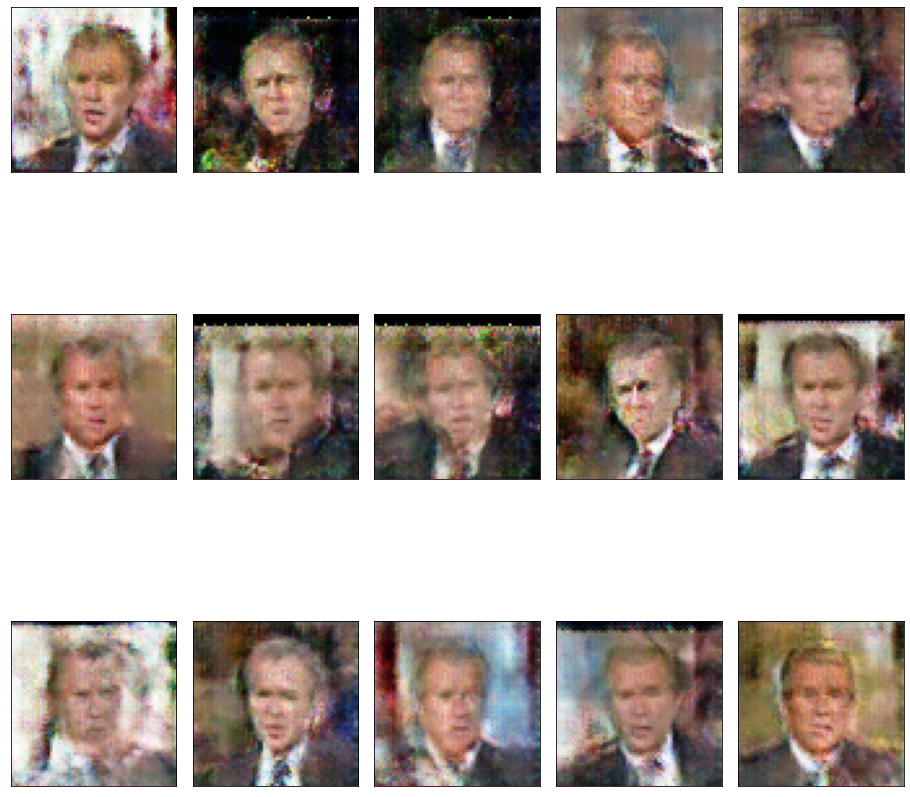

In [6]:
# Plot images from best or last model
checkpoint_file = 'checkpoints/v_gan'
if os.path.isfile(f'{checkpoint_file}.pt'):
    gen = torch.load(f'{checkpoint_file}.pt', map_location=device)
print('*** Images Generated from best model:')
samples = gen.sample(n=15, with_grad=False).cpu()
fig, _ = plot.tensors_as_images(samples, nrows=3, figsize=(16,16))

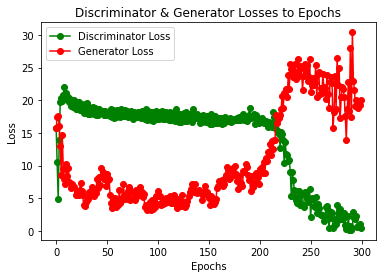

In [7]:
# plotting discriminator loss and generator loss
path = "project/outputs_for_graphs/"
first_filename = "discriminator_v_gan.txt"
second_filename = "generator_v_gan.txt"
graph_title = "Discriminator & Generator Losses to Epochs"
x_title = "Epochs"
y_title = "Loss"
plot_graph(path+first_filename, path+second_filename, graph_title, x_title, y_title)

**Results Analysis**

**Observation**: From the graph we can see that with the progress of the epochs the discriminator is capable of better figuring out "faked" images while the loss of the Generator is staying raughly the same until we get around the 200th epoch when a sharp change appears.

**Hypothesis**: It is likely that the network is shallow, but when we try a deeper network it caused vanishing gradient, we saw that the batch normalization helped for that problem but not enough. The fact that the Generator loss stay stable and doesn't improve it's generated images, allows the Discriminator to learn the patterns of the generated images and shrink it's loss with the progress of the epochs until it manages to overcome the Generator. 

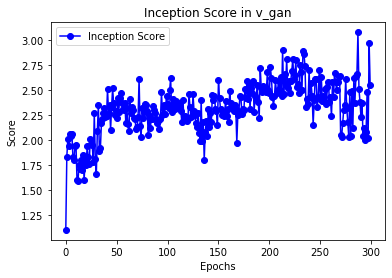

In [8]:
# plotting inception score per epoch
path = "project/outputs_for_graphs/"
first_filename = "inception_v_gan.txt"
graph_title = "Inception Score in v_gan"
x_title = "Epochs"
y_title = "Score"
plot_inception_graph(path+first_filename, graph_title, x_title, y_title)

**Results Analysis**

**Observation**: From the graph we can see an improvment in "inception score" with the progress of the epochs.

**Hypothesis**: This is the kind of behavior we expect to see with the learning process although it is clear that the vanilla gan is missing stadability in training process.

In [9]:
import project.spectral_norm_gan as sn_gan
sn_gen = train_gan_model(device, ds_gwb, sn_gan,'sn_gan',sn_gan_hyperparams())
print(sn_gen)

<class 'torch.device'>
{'batch_size': 32, 'z_dim': 128, 'data_label': 1, 'label_noise': 0.2, 'discriminator_optimizer': {'type': 'SGD', 'lr': 0.0075}, 'generator_optimizer': {'type': 'Adam', 'lr': 0.001, 'betas': (0.5, 0.999)}}
<module 'project.spectral_norm_gan' from '/home/topaz.aharon/DL/hw4/project/spectral_norm_gan.py'>
 EPOCH 1/300 
100%|██████████| 17/17 [00:03<00:00,  4.53it/s]
discriminator loss - 1.2940066491856295
generator loss     - 0.9397288946544423
 EPOCH 2/300 
100%|██████████| 17/17 [00:03<00:00,  4.56it/s]
discriminator loss - 1.262546974069932
generator loss     - 0.8940686618580538
 EPOCH 3/300 
100%|██████████| 17/17 [00:03<00:00,  4.51it/s]
discriminator loss - 1.0847020079107845
generator loss     - 1.1214721027542562
 EPOCH 4/300 
100%|██████████| 17/17 [00:03<00:00,  4.48it/s]
discriminator loss - 1.3440036984050976
generator loss     - 0.861057905589833
 EPOCH 5/300 
100%|██████████| 17/17 [00:03<00:00,  4.56it/s]
discriminator loss - 1.4075239405912512
gener

*** Images Generated from best model:


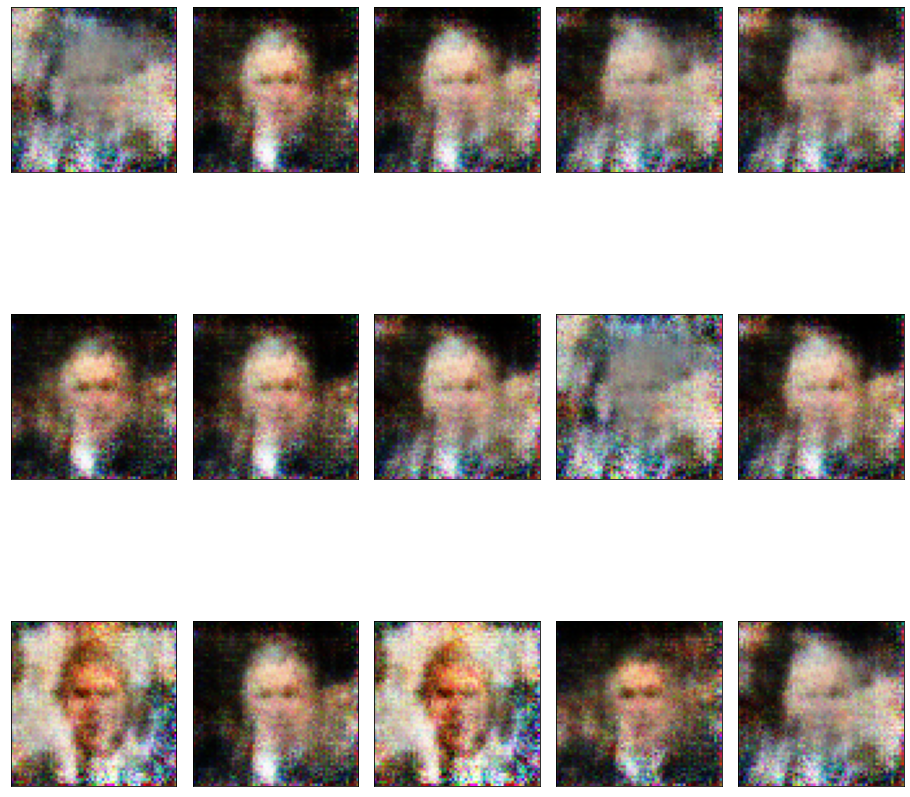

In [10]:
# Plot images from best or last model
checkpoint_file = 'checkpoints/sn_gan'
if os.path.isfile(f'{checkpoint_file}.pt'):
    gen = torch.load(f'{checkpoint_file}.pt', map_location=device)
print('*** Images Generated from best model:')
samples = gen.sample(n=15, with_grad=False).cpu()
fig, _ = plot.tensors_as_images(samples, nrows=3, figsize=(16,16))

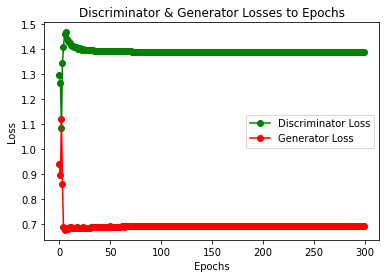

In [11]:
# plotting discriminator loss and generator loss
path = "project/outputs_for_graphs/"
first_filename = "discriminator_sn_gan.txt"
second_filename = "generator_sn_gan.txt"
graph_title = "Discriminator & Generator Losses to Epochs"
x_title = "Epochs"
y_title = "Loss"
plot_graph(path+first_filename, path+second_filename, graph_title, x_title, y_title)

**Results Analysis**

**Observation**: From the graph we can see that the Discriminator loss is higher. Furthermore, we can notice a big improvment in the loss values in comparison to the loss values of the vanilla gan model.

**Hypothesis**: The reason to those results might be that the Generator is capabale of "tricking" the Discriminator. The consistency in loss values might refer to the fact that the Discriminator didn't learn the "fake" patterns and keep recognizing them as "real" images. We also believe that in our case, although we have an improvment in loss values in comparison to the vanilla gan model, still the Spectral Norm had some negative effect on the Discriminator (in the next inception score plot, we can see a support for this claim) . Maybe we could better utilize the hyperparameters and choose a better architecture for the Spectral Norm uses.

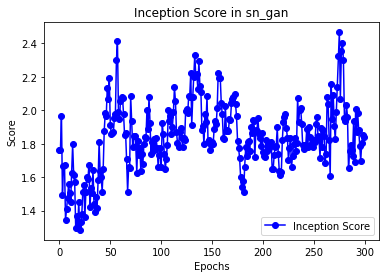

In [12]:
# plotting inception score per epoch
path = "project/outputs_for_graphs/"
first_filename = "inception_sn_gan.txt"
graph_title = "Inception Score in sn_gan"
x_title = "Epochs"
y_title = "Score"
plot_inception_graph(path+first_filename, graph_title, x_title, y_title)

**Results Analysis**

**Observation**: From the graph we can see that the Inception Score arises with epochs

**Hypothesis**: The Discriminator loss (in abs values) is twice the size of the Generator loss, this probably one of the reasons allowing a constant improvment in the generated images.The "level" of images generated by the Generator is improved with time(epochs). This is the kind of behaviour we wish in a learning process.

In [13]:
import project.wass_gan as w_gan
w_gen = train_gan_model(device, ds_gwb, w_gan,'w_gan',w_gan_hyperparams())

<class 'torch.device'>
{'batch_size': 32, 'z_dim': 128, 'data_label': 1, 'label_noise': 0.0002, 'discriminator_optimizer': {'type': 'RMSprop', 'lr': 3.5e-05}, 'generator_optimizer': {'type': 'RMSprop', 'lr': 0.0001}, 'N': 5}
<module 'project.wass_gan' from '/home/topaz.aharon/DL/hw4/project/wass_gan.py'>
 EPOCH 1/300 
100%|██████████| 17/17 [00:08<00:00,  1.92it/s]
discriminator loss - -0.21067356931812622
generator loss     - -0.27898407990441604
 EPOCH 2/300 
100%|██████████| 17/17 [00:08<00:00,  1.94it/s]
discriminator loss - -0.40541185350979075
generator loss     - -0.43960028711487265
 EPOCH 3/300 
100%|██████████| 17/17 [00:08<00:00,  1.96it/s]
discriminator loss - -0.47807245219455047
generator loss     - -0.11573589154902626
 EPOCH 4/300 
100%|██████████| 17/17 [00:08<00:00,  1.94it/s]
discriminator loss - -0.5343939732102787
generator loss     - 0.15241202755885966
 EPOCH 5/300 
100%|██████████| 17/17 [00:08<00:00,  1.95it/s]
discriminator loss - -0.5892613495097441
generator

*** Images Generated from best model:


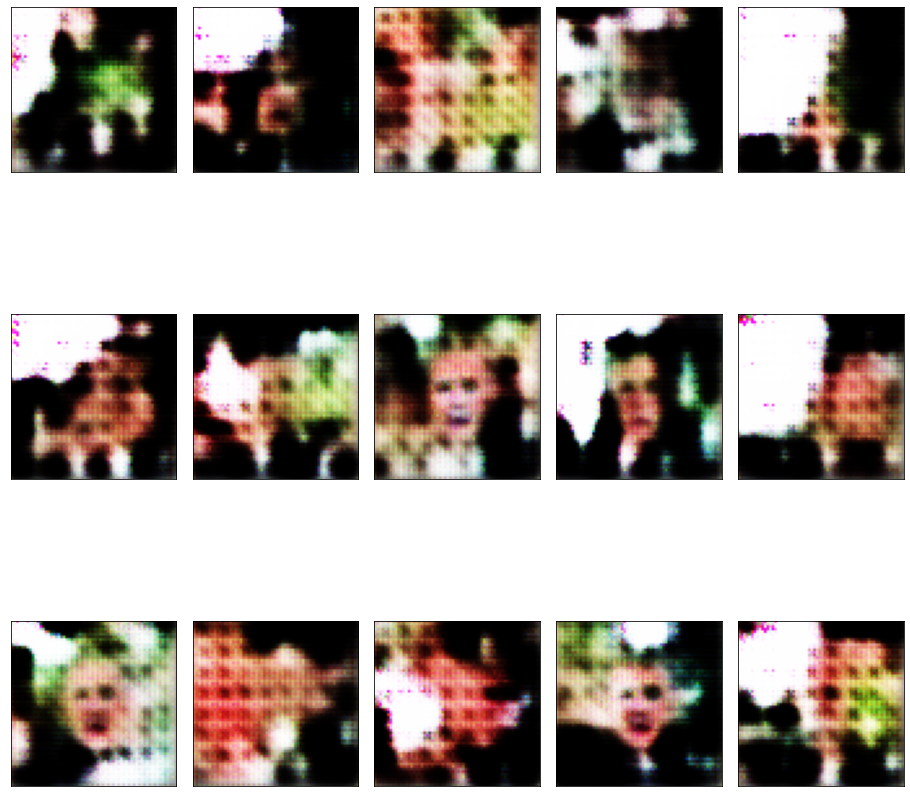

In [14]:
# Plotting images from best or last model
checkpoint_file = 'checkpoints/w_gan'
if os.path.isfile(f'{checkpoint_file}.pt'):
    gen = torch.load(f'{checkpoint_file}.pt', map_location=device)
print('*** Images Generated from best model:')
samples = gen.sample(n=15, with_grad=False).cpu()
fig, _ = plot.tensors_as_images(samples, nrows=3, figsize=(16,16))

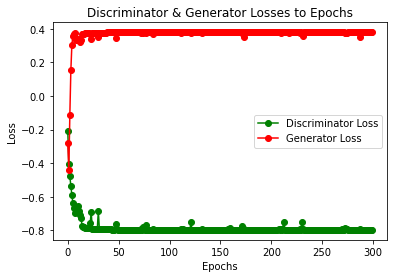

In [15]:
# plotting discriminator loss and generator loss
path = "project/outputs_for_graphs/"
first_filename = "discriminator_w_gan.txt"
second_filename = "generator_w_gan.txt"
graph_title = "Discriminator & Generator Losses to Epochs"
x_title = "Epochs"
y_title = "Loss"
plot_graph(path+first_filename, path+second_filename, graph_title, x_title, y_title)

**Results Analysis**

**Observation**: From the graph we can see that the Discriminator loss is higher (in absolute values). Furthermore, we can notice a big improvment in the loss values in comparison to the loss values of both the vanilla gan model and the spectral normalization gan model.

**Hypothesis**: The reason to those results might be that the Generator is capabale of "tricking" the Discriminator. The consistency in loss values might refer to the fact that the Discriminator didn't learn the "fake" patterns and keep recognizing them as "real" images.

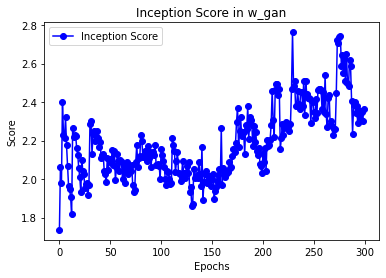

In [16]:
# plotting inception score per epoch
path = "project/outputs_for_graphs/"
first_filename = "inception_w_gan.txt"
graph_title = "Inception Score in w_gan"
x_title = "Epochs"
y_title = "Score"
plot_inception_graph(path+first_filename, graph_title, x_title, y_title)

**Results Analysis**

**Observation**: From the graph we can't see a solid improvment graph, still relatively good results for the "George Bush" images.

**Hypothesis**: This might happen due to the fact that the wass gan improvment has a really good starting point with low loss values. Therefore, allowing a quick learning process. 

In [8]:
import project.spectral_norm_wass_gan as sn_w_gan
sn_plus_w_gen = train_gan_model(device, ds_gwb, sn_w_gan,'sn_w_gan',w_gan_hyperparams())

<class 'torch.device'>
{'batch_size': 32, 'z_dim': 128, 'data_label': 1, 'label_noise': 0.0002, 'discriminator_optimizer': {'type': 'RMSprop', 'lr': 3.5e-05}, 'generator_optimizer': {'type': 'RMSprop', 'lr': 0.0001}, 'N': 5}
<module 'project.spectral_norm_wass_gan' from '/home/topaz.aharon/DL/hw4/project/spectral_norm_wass_gan.py'>
 EPOCH 1/300 
100%|██████████| 17/17 [00:09<00:00,  1.82it/s]
discriminator loss - -320.19034531537227
generator loss     - 255.63244269875918


/home/topaz.aharon/miniconda3/envs/cs236781-hw/lib/python3.8/site-packages/torch/nn/functional.py:3118: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn("Default upsampling behavior when mode={} is changed "
/home/topaz.aharon/DL/hw4/project/score_inception.py:45: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x).data.cpu().numpy()


 EPOCH 2/300 
100%|██████████| 17/17 [00:09<00:00,  1.88it/s]
discriminator loss - -141.09687176872703
generator loss     - 63.25946272120756
 EPOCH 3/300 
100%|██████████| 17/17 [00:09<00:00,  1.87it/s]
discriminator loss - -102.11581937004539
generator loss     - 42.461442442501294
 EPOCH 4/300 
100%|██████████| 17/17 [00:09<00:00,  1.86it/s]
discriminator loss - -109.38691756304573
generator loss     - 103.92164628645953
 EPOCH 5/300 
100%|██████████| 17/17 [00:09<00:00,  1.86it/s]
discriminator loss - -120.63639966179343
generator loss     - 40.69862472309786
Saved checkpoint - 5/300
 EPOCH 6/300 
100%|██████████| 17/17 [00:09<00:00,  1.86it/s]
discriminator loss - -103.38709887336282
generator loss     - 39.213730952318976
 EPOCH 7/300 
100%|██████████| 17/17 [00:09<00:00,  1.84it/s]
discriminator loss - -107.11818874583525
generator loss     - 32.73997822929831
 EPOCH 8/300 
100%|██████████| 17/17 [00:09<00:00,  1.84it/s]
discriminator loss - -90.61930555455825
generator loss    

*** Images Generated from best model:


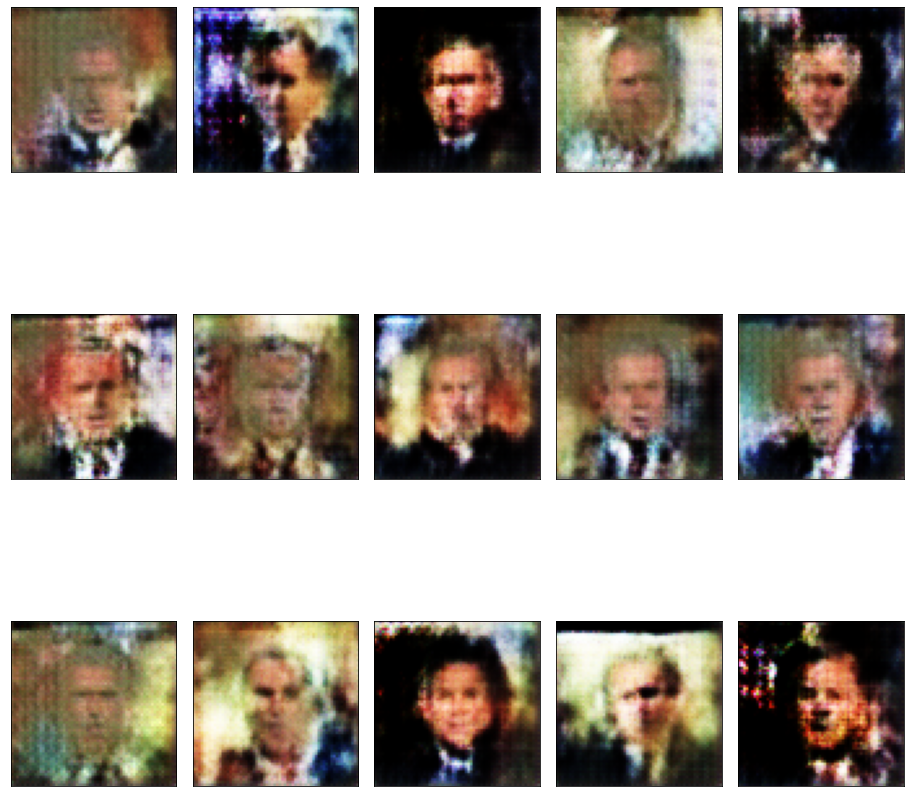

In [9]:
# Plotting images from best or last model
checkpoint_file = 'checkpoints/sn_w_gan'
if os.path.isfile(f'{checkpoint_file}.pt'):
    gen = torch.load(f'{checkpoint_file}.pt', map_location=device)
print('*** Images Generated from best model:')
samples = gen.sample(n=15, with_grad=False).cpu()
fig, _ = plot.tensors_as_images(samples, nrows=3, figsize=(16,16))

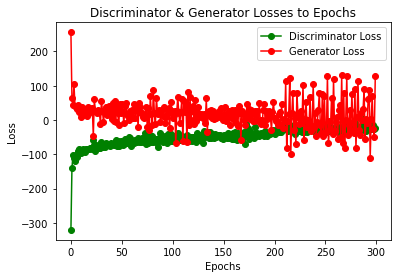

In [10]:
# plotting discriminator loss and generator loss
path = "project/outputs_for_graphs/"
first_filename = "discriminator_sn_w_gan.txt"
second_filename = "generator_sn_w_gan.txt"
graph_title = "Discriminator & Generator Losses to Epochs"
x_title = "Epochs"
y_title = "Loss"
plot_graph(path+first_filename, path+second_filename, graph_title, x_title, y_title)

**Results Analysis**

**Observation**: We can notice a significant improvment with the progress of the epochs in both the Discriminator and Generator losses tends towards zero. 

**Hypothesis**: This is happening due to the contribution of the two (spectral and wass togather) and fast learning. Hyperparameter has a direct effect on the starting point values of the loss. It is possible that we could get better reults with different hyperparameters.

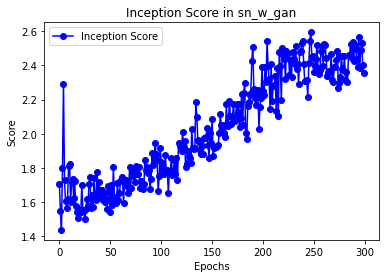

In [11]:
# plotting inception score per epoch
path = "project/outputs_for_graphs/"
first_filename = "inception_sn_w_gan.txt"
graph_title = "Inception Score in sn_w_gan"
x_title = "Epochs"
y_title = "Score"
plot_inception_graph(path+first_filename, graph_title, x_title, y_title)

**Results Analysis**

**Observation**: A solid improvment in the inception score with the progress in epochs.

**Hypothesis**: This is the desired behavior we wanted to see, the combination of both the sn and wass left a positive impact on outcome.

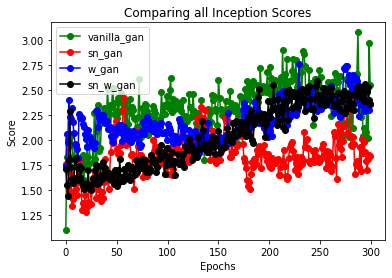

In [12]:
# plotting a graph comparing all inception scores
path = "project/outputs_for_graphs/"
first_filename =  "inception_v_gan.txt"
second_filename =  "inception_sn_gan.txt"
third_filename =  "inception_w_gan.txt"
forth_filename =  "inception_sn_w_gan.txt"
graph_title = "Comparing all Inception Scores"
x_title = "Epochs"
y_title = "Score"
plot_all_inceptions_graph(path+first_filename, path+second_filename, path+third_filename, path+forth_filename, graph_title, x_title, y_title)

**Results Analysis**

**Observation**: We can see a relatively good "objective" results in all gans. We can also notice a significant and stable improvment in our sn_w_gan with the progress of the epochs. we can notice the sn_w_gan(black) inception score is above the sn_gan(red) and soon enough will surpass the w_gan scores(blue). We see a decrease in inception score from the 250th epoch towards the 300th in the vanilla gan mostly.

**Hypothesis**: We believe with more epochs our sn_w_gan will "win the race". Although our vanilla gan results aren't far behind, they are missing stadability, the improvment in train stadability in other gans is due to the spectral normalization (sn_gan & sn_w_gan).